Optimization terminated successfully.
{'pgal': 0.7165022206894713, 'gal_hrv': -289.56645907006055, 'gal_vsig': 3.7211781875877517, 'gal_feh': -1.800205543196296, 'gal_fehsig': 0.0010000000012937843, 'mw_hrv': -100.81867711506382, 'mw_vsig': 108.75316271904566, 'mw_feh': 0.0017528698816049477, 'mw_fehsig': 1.188011371077196}


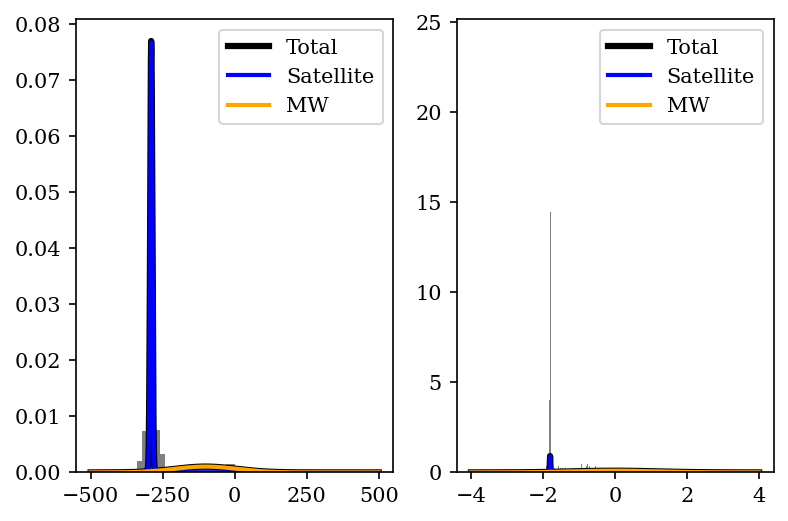

In [2]:
import matplotlib.pyplot as plt
from dgf import DualPopulationMetal
import numpy as np
import pandas as pd
data = pd.read_hdf("prob_df_draco_c.hdf")
fitter = DualPopulationMetal([.5, -300, 50, -1.8, .1, 90, 100, -.5, 4], data.HRV, data.dHRV, data['[Fe/H]'], data['d[Fe/H]'])

def assign_key(arr):
        return {
                "pgal": arr[0],

                "gal_hrv": arr[1],
                "gal_vsig": arr[2],
                "gal_feh": arr[3],
                "gal_fehsig": arr[4],

                "mw_hrv": arr[5],
                "mw_vsig": arr[6],
                "mw_feh": arr[7],
                "mw_fehsig": arr[8]
        }

theta = [.8, -300, 20, -1.8, .03, -40, 100, 0, 4]

popt = fitter.getOptimalValues(theta)
print(assign_key(popt))
fitter.project_model(popt, rvmin=-500, rvmax=500, fehmin=-4, fehmax=4)

In [3]:
fitter.run(20, popt)

100%|██████████| 5000/5000 [02:15<00:00, 36.85it/s]


(array([[ 7.37826026e-01, -2.89047999e+02,  4.91112543e+00,
         -1.79553728e+00,  1.39563411e-03, -9.93420359e+01,
          1.11415020e+02, -9.88832608e-01,  5.95552263e-01],
        [ 6.89027726e-01, -2.90446219e+02,  1.85606934e+00,
         -1.79732007e+00,  1.68014437e-03, -9.73513420e+01,
          1.19986576e+02, -9.95215972e-01,  6.06499016e-01],
        [ 7.34735284e-01, -2.91585190e+02,  8.85537413e+00,
         -1.80332795e+00,  9.45324047e-03, -8.85443344e+01,
          1.16173128e+02, -1.02455804e+00,  5.57624759e-01],
        [ 7.02334479e-01, -2.91214928e+02,  5.40837639e-01,
         -1.79377688e+00,  7.00991204e-03, -1.03213696e+02,
          1.08828039e+02, -1.05397545e+00,  5.80884272e-01],
        [ 7.47547905e-01, -2.89814687e+02,  8.67641850e+00,
         -1.79749379e+00,  4.00870735e-03, -9.34218888e+01,
          1.12829354e+02, -1.02609992e+00,  5.98355429e-01],
        [ 6.82548398e-01, -2.88829281e+02,  3.54278411e+00,
         -1.80273266e+00,  3.938282

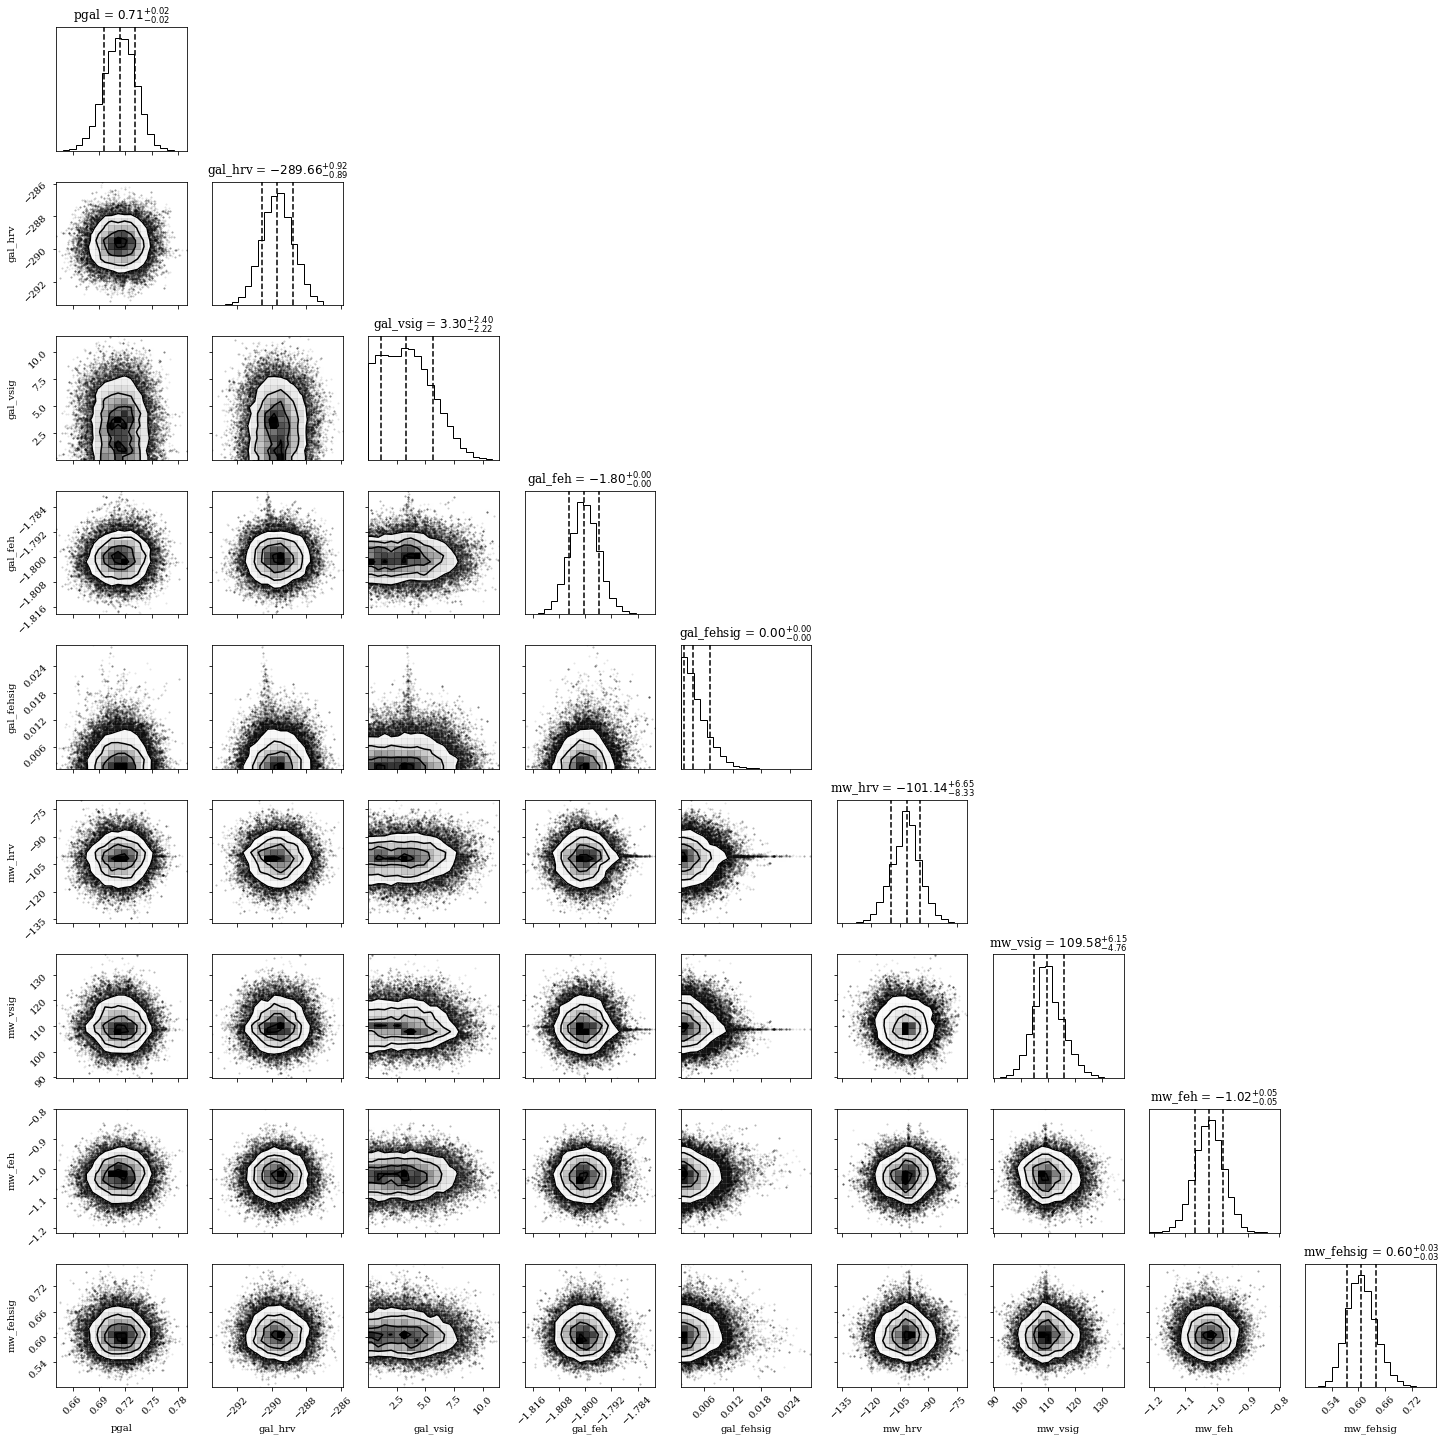

In [4]:
fitter.plot()

In [5]:
fitter.get_results()

{'pgal': 0.7138132618297445,
 'gal_hrv': -289.6558768288051,
 'gal_vsig': 3.3017355277933773,
 'gal_feh': -1.800348171884149,
 'gal_fehvsig': 0.003696243744115068,
 'mw_hrv': -101.1355041896072,
 'mw_vsig': 109.58139011129349,
 'mw_feh': -1.0239814447198976,
 'mw_fehvsig': 0.604999619216434}

KeyError: 'hrv_gal'

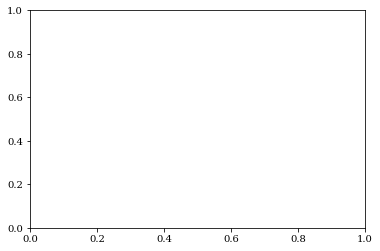

In [7]:
from scipy.stats import norm
fig, ax = plt.subplots()
arr = norm.pdf(
            data["HRV"], loc=fitter.results["hrv_gal"], scale=5*fitter.results["vsig_gal"]
        )
ax.scatter(data["RA"], data["DEC"], c=arr/np.max(arr), s=arr/np.max(arr)*10)
plt.show()